In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [62]:
fps = 30
frametime = 1/fps

In [63]:
# load cam 1 excels
path_fc = r'/home/merge/merge/water/'
df_call = pd.read_csv(path_fc+'output_7slices.csv', index_col=None, header=0)

df_call

,Frame,Tank 1 Slice 1 Min,Tank 1 Slice 1 Max,Tank 1 Slice 2 Min,Tank 1 Slice 2 Max,Tank 1 Slice 3 Min,Tank 1 Slice 3 Max,Tank 1 Slice 4 Min,Tank 1 Slice 4 Max,Tank 1 Slice 5 Min,...,Tank 3 Slice 3 Min,Tank 3 Slice 3 Max,Tank 3 Slice 4 Min,Tank 3 Slice 4 Max,Tank 3 Slice 5 Min,Tank 3 Slice 5 Max,Tank 3 Slice 6 Min,Tank 3 Slice 6 Max,Tank 3 Slice 7 Min,Tank 3 Slice 7 Max
0,1,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,2,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,3,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,4,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4,5,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7555,7556,0.0,6.739817,0.0,6.739817,0.0,6.69872,0.0,6.657624,0.0,...,0.331294,6.253177,0.331294,6.377412,0.579765,6.418824,0.579765,6.418824,0.0,6.294588
7556,7557,0.0,6.739817,0.0,6.739817,0.0,6.69872,0.0,6.657624,0.0,...,0.331294,6.253177,0.331294,6.377412,0.579765,6.418824,0.579765,6.418824,0.0,6.294588
7557,7558,0.0,6.739817,0.0,6.739817,0.0,6.69872,0.0,6.616528,0.0,...,0.579765,6.253177,0.496941,6.377412,0.579765,6.418824,0.579765,6.418824,0.0,6.377412
7558,7559,0.0,6.739817,0.0,6.739817,0.0,6.69872,0.0,6.657624,0.0,...,0.579765,6.253177,0.496941,6.294588,0.579765,6.377412,0.579765,6.418824,0.0,6.294588


In [64]:
df_c1 = df_call.filter(regex=('(Frame)|(Tank 1 Slice .* Max)'))
df_c2 = df_call.filter(regex=('(Frame)|(Tank 2 Slice .* Max)'))
df_c3 = df_call.filter(regex=('(Frame)|(Tank 3 Slice .* Max)'))

<AxesSubplot:xlabel='Frame'>

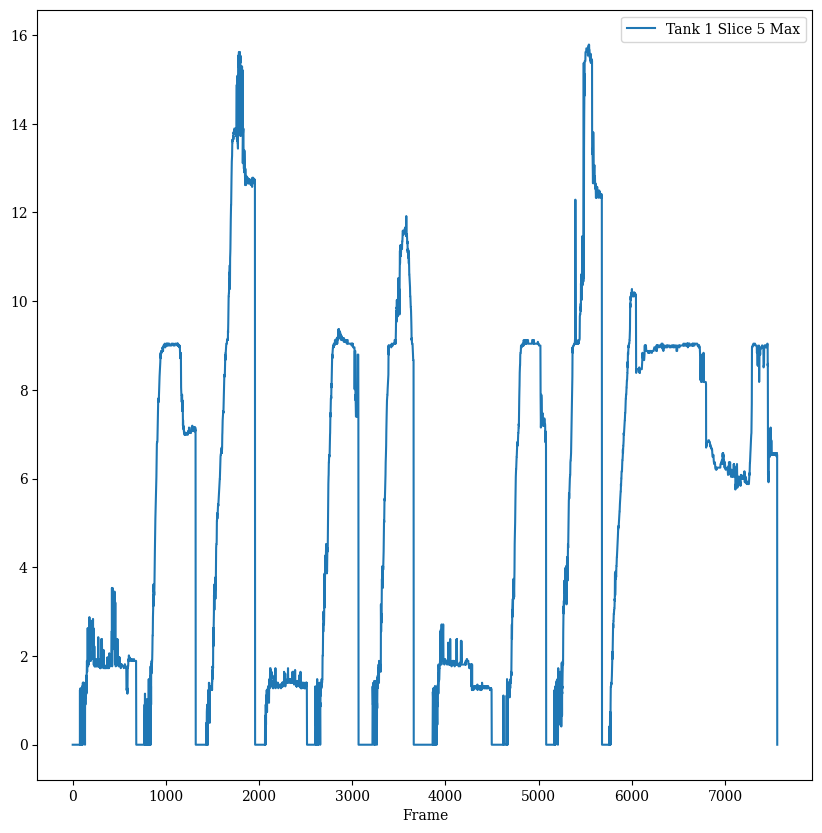

In [65]:
df_c1.plot(x='Frame', y="Tank 1 Slice 5 Max", figsize=(10,10))
# df_c1.plot())

In [66]:
df_c1p1 = df_c1[df_c1["Frame"]<700]
df_c1p2 = df_c1[ (df_c1["Frame"] > 700) & (df_c1["Frame"] < 1400) ]
df_c1p3 = df_c1[ (df_c1["Frame"] > 1400) & (df_c1["Frame"] < 2000) ]
df_c1p4 = df_c1[ (df_c1["Frame"] > 2000) & (df_c1["Frame"] < 2580) ]
df_c1p5 = df_c1[ (df_c1["Frame"] > 2580) & (df_c1["Frame"] < 3100) ]
df_c1p6 = df_c1[ (df_c1["Frame"] > 3100) & (df_c1["Frame"] < 3750) ]
df_c1p7 = df_c1[ (df_c1["Frame"] > 3750) & (df_c1["Frame"] < 4510) ]
df_c1p8 = df_c1[ (df_c1["Frame"] > 4510) & (df_c1["Frame"] < 5100) ]
df_c1p9 = df_c1[ (df_c1["Frame"] > 5100) & (df_c1["Frame"] < 5700) ]

##for clipping at a given time. will replace .Frame with .Time and add a time for each parab 
df_c1p1 = df_c1p1.iloc[(df_c1p1.filter(regex=('Tank 1 Slice .* Max')) != 0).idxmax().min():]
df_c1p2 = df_c1p2.iloc[(df_c1p2.filter(regex=('Tank 1 Slice .* Max')) != 0).idxmax().min()-700:]
df_c1p3 = df_c1p3.iloc[(df_c1p3.filter(regex=('Tank 1 Slice .* Max')) != 0).idxmax().min()-1400:]
df_c1p4 = df_c1p4.iloc[(df_c1p4.filter(regex=('Tank 1 Slice .* Max')) != 0).idxmax().min()-2000:]
df_c1p5 = df_c1p5.iloc[(df_c1p5.filter(regex=('Tank 1 Slice .* Max')) != 0).idxmax().min()-2580:]
df_c1p6 = df_c1p6.iloc[(df_c1p6.filter(regex=('Tank 1 Slice .* Max')) != 0).idxmax().min()-3100:]
df_c1p7 = df_c1p7.iloc[(df_c1p7.filter(regex=('Tank 1 Slice .* Max')) != 0).idxmax().min()-3750:]
df_c1p8 = df_c1p8.iloc[(df_c1p8.filter(regex=('Tank 1 Slice .* Max')) != 0).idxmax().min()-4510:]
df_c1p9 = df_c1p9.iloc[(df_c1p9.filter(regex=('Tank 1 Slice .* Max')) != 0).idxmax().min()-5100:]

In [67]:
df_c2p1 = df_c2[df_c2["Frame"]<700]
df_c2p2 = df_c2[ (df_c2["Frame"] > 700) & (df_c2["Frame"] < 1400) ]
df_c2p3 = df_c2[ (df_c2["Frame"] > 1400) & (df_c2["Frame"] < 2000) ]
df_c2p4 = df_c2[ (df_c2["Frame"] > 2000) & (df_c2["Frame"] < 2580) ]
df_c2p5 = df_c2[ (df_c2["Frame"] > 2580) & (df_c2["Frame"] < 3100) ]
df_c2p6 = df_c2[ (df_c2["Frame"] > 3100) & (df_c2["Frame"] < 3750) ]
df_c2p7 = df_c2[ (df_c2["Frame"] > 3750) & (df_c2["Frame"] < 4510) ]
df_c2p8 = df_c2[ (df_c2["Frame"] > 4510) & (df_c2["Frame"] < 5100) ]
df_c2p9 = df_c2[ (df_c2["Frame"] > 5100) & (df_c2["Frame"] < 5700) ]

##for clipping at a given time. will replace .Frame with .Time and add a time for each parab 
df_c2p1 = df_c2p1.iloc[(df_c2p1.filter(regex=('Tank 2 Slice .* Max')) != 0).idxmax().min():]
df_c2p2 = df_c2p2.iloc[(df_c2p2.filter(regex=('Tank 2 Slice .* Max')) != 0).idxmax().min()-700:]
df_c2p3 = df_c2p3.iloc[(df_c2p3.filter(regex=('Tank 2 Slice .* Max')) != 0).idxmax().min()-1400:]
df_c2p4 = df_c2p4.iloc[(df_c2p4.filter(regex=('Tank 2 Slice .* Max')) != 0).idxmax().min()-2000:]
df_c2p5 = df_c2p5.iloc[(df_c2p5.filter(regex=('Tank 2 Slice .* Max')) != 0).idxmax().min()-2580:]
df_c2p6 = df_c2p6.iloc[(df_c2p6.filter(regex=('Tank 2 Slice .* Max')) != 0).idxmax().min()-3100:]
df_c2p7 = df_c2p7.iloc[(df_c2p7.filter(regex=('Tank 2 Slice .* Max')) != 0).idxmax().min()-3750:]
df_c2p8 = df_c2p8.iloc[(df_c2p8.filter(regex=('Tank 2 Slice .* Max')) != 0).idxmax().min()-4510:]
df_c2p9 = df_c2p9.iloc[(df_c2p9.filter(regex=('Tank 2 Slice .* Max')) != 0).idxmax().min()-5100:]

In [68]:
df_c3p1 = df_c3[df_c3["Frame"]<700]
df_c3p2 = df_c3[ (df_c3["Frame"] > 700) & (df_c3["Frame"] < 1400) ]
df_c3p3 = df_c3[ (df_c3["Frame"] > 1400) & (df_c3["Frame"] < 2000) ]
df_c3p4 = df_c3[ (df_c3["Frame"] > 2000) & (df_c3["Frame"] < 2580) ]
df_c3p5 = df_c3[ (df_c3["Frame"] > 2580) & (df_c3["Frame"] < 3100) ]
df_c3p6 = df_c3[ (df_c3["Frame"] > 3100) & (df_c3["Frame"] < 3750) ]
df_c3p7 = df_c3[ (df_c3["Frame"] > 3750) & (df_c3["Frame"] < 4510) ]
df_c3p8 = df_c3[ (df_c3["Frame"] > 4510) & (df_c3["Frame"] < 5100) ]
df_c3p9 = df_c3[ (df_c3["Frame"] > 5100) & (df_c3["Frame"] < 5700) ]

# ##for clipping at a given time. will replace .Frame with .Time and add a time for each parab 
df_c3p1 = df_c3p1.iloc[(df_c3p1.filter(regex=('Tank 3 Slice .* Max')) != 0).idxmax().min():]
df_c3p2 = df_c3p2.iloc[(df_c3p2.filter(regex=('Tank 3 Slice .* Max')) != 0).idxmax().min()-700:]
df_c3p3 = df_c3p3.iloc[(df_c3p3.filter(regex=('Tank 3 Slice .* Max')) != 0).idxmax().min()-1400:]
df_c3p4 = df_c3p4.iloc[(df_c3p4.filter(regex=('Tank 3 Slice .* Max')) != 0).idxmax().min()-2000:]
df_c3p5 = df_c3p5.iloc[(df_c3p5.filter(regex=('Tank 3 Slice .* Max')) != 0).idxmax().min()-2580:]
df_c3p6 = df_c3p6.iloc[(df_c3p6.filter(regex=('Tank 3 Slice .* Max')) != 0).idxmax().min()-3100:]
df_c3p7 = df_c3p7.iloc[(df_c3p7.filter(regex=('Tank 3 Slice .* Max')) != 0).idxmax().min()-3750:]
df_c3p8 = df_c3p8.iloc[(df_c3p8.filter(regex=('Tank 3 Slice .* Max')) != 0).idxmax().min()-4510:]
df_c3p9 = df_c3p9.iloc[(df_c3p9.filter(regex=('Tank 3 Slice .* Max')) != 0).idxmax().min()-5100:]

In [69]:
h = 16.192    #chamber height

df_list = [df_c1p1, df_c1p2, df_c1p3, df_c1p4, df_c1p5, df_c1p6, df_c1p7, df_c1p8, df_c1p9,
           df_c2p1, df_c2p2, df_c2p3, df_c2p4, df_c2p5, df_c2p6, df_c2p7, df_c2p8, df_c2p9, 
           df_c3p1, df_c3p2, df_c3p3, df_c3p4, df_c3p5, df_c3p6, df_c3p7, df_c3p8, df_c3p9]

def addingNab(df):
    mask = df.columns.str.contains('Slice\s[^4]\sMax')
    df_masked = df.loc[:,mask]
    df["Nab25"] = df_masked.gt(0.25*h).sum(axis=1)
    df["Nab35"] = df_masked.gt(0.35*h).sum(axis=1)
    df["Nab45"] = df_masked.gt(0.45*h).sum(axis=1)
    df["Nab50"] = df_masked.gt(0.50*h).sum(axis=1)
    df["Nab75"] = df_masked.gt(0.75*h).sum(axis=1)
    df["Nab95"] = df_masked.gt(0.95*h).sum(axis=1)
    return df

for df in df_list: 
    df = addingNab(df)

In [70]:
#creating summary df
cam_list = []
for i in range(1,4):
    cam_list = np.append(cam_list, np.full((1,9),[i]))

i=1
parab_list = []
while i <= 3:
    for j in range(1,10):
        parab_list = np.append(parab_list, j)
    i+=1

df_sum = pd.DataFrame({'cam': cam_list, 'parab': parab_list})


indices = [0, 700, 1400, 2000, 2580, 3100, 3750, 4510, 5100]

#getting the time it takes from the first instance to get to the percent
def timeto(df,  minslice, index):
    idxTime25 = (df.Nab25 >= minslice).idxmax() - index
    Timeto25 = (df.Frame.iloc[idxTime25] - df.Frame.iloc[0]) * frametime
    
    idxTime35 = (df.Nab35 >= minslice).idxmax() - index
    Timeto35 = (df.Frame.iloc[idxTime35] - df.Frame.iloc[0]) * frametime
    
    idxTime45 = (df.Nab45 >= minslice).idxmax() - index
    Timeto45 = (df.Frame.iloc[idxTime45] - df.Frame.iloc[0]) * frametime
    
    idxTime50 = (df.Nab50 >= minslice).idxmax() - index
    Timeto50 = (df.Frame.iloc[idxTime50] - df.Frame.iloc[0]) * frametime

    idxTime75 = (df.Nab75 >= minslice).idxmax() - index
    Timeto75 = (df.Frame.iloc[idxTime75] - df.Frame.iloc[0]) * frametime

    idxTime95 = (df.Nab95 >= minslice).idxmax() - index
    Timeto95 = (df.Frame.iloc[idxTime95] - df.Frame.iloc[0]) * frametime
    arr = [Timeto25, Timeto35, Timeto45, Timeto50, Timeto75, Timeto95]
    return np.array(arr)


arrofTimesto = []
i=0
for df in df_list:
    index = indices[i]
    arrofTimesto.append(timeto(df, 1, index))
    i+=1
    if (i==9):
        i=0
        
    
arrofTimesto =  pd.DataFrame(np.array(arrofTimesto))
df_sum = pd.concat([df_sum, arrofTimesto], axis=1)
df_sum.rename(columns={0: 'Timeto25', 1: 'Timeto35', 2: 'Timeto45',
                       3: 'Timeto50', 4: 'Timeto75', 5: 'Timeto95'}, inplace=True)

In [71]:
###amount of time spent above
# df_sum.drop(['frac25', 'frac35', 'frac45', 'frac50', 'frac75', 'frac95'], inplace=True, axis=1)
def timespent(df,  minslice):
    tottime = df.Frame.iloc[-1] - df.Frame.iloc[0] * frametime

    frames25 = (df.Nab25 >= minslice).sum() 
    timespent25 = frames25 * frametime
    frac25 = timespent25 / tottime
    
    
    frames35 = (df.Nab35 >= minslice).sum() 
    timespent35 = frames35 * frametime
    frac35 = timespent35 / tottime
    
    frames45 = (df.Nab45 >= minslice).sum() 
    timespent45 = frames45 * frametime
    frac45 = timespent45 / tottime
    
    frames50 = (df.Nab50 >= minslice).sum() 
    timespent50 = frames50 * frametime
    frac50 = timespent50 / tottime
    
    frames75 = (df.Nab75 >= minslice).sum() 
    timespent75 = frames75 * frametime
    frac75 = timespent75 / tottime
    
    frames95 = (df.Nab95 >= minslice).sum() 
    timespent95 = frames95 * frametime
    frac95 = timespent95 / tottime

    arr = [frac25, frac35, frac45, frac50, frac75, frac95]
    return np.array(arr)


arrofTimespent = []
for df in df_list: 
    arrofTimespent.append(timespent(df, 3))
    
arrofTimespent =  pd.DataFrame(np.array(arrofTimespent))
df_sum = pd.concat([df_sum, arrofTimespent], axis=1)
df_sum.rename(columns={0: 'frac25', 1: 'frac35', 2: 'frac45',
                       3: 'frac50', 4: 'frac75',5: 'frac95'}, inplace=True)

df_sum

,cam,parab,Timeto25,Timeto35,Timeto45,Timeto50,Timeto75,Timeto95,frac25,frac35,frac45,frac50,frac75,frac95
0,1.0,1.0,6.366667,2.366667,2.366667,2.366667,2.366667,2.366667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.0,2.0,5.466667,6.366667,7.066667,7.233333,1.766667,1.766667,0.010700,0.010312,0.007497,0.005653,0.000000,0.000000
2,1.0,3.0,3.966667,4.700000,6.200000,7.400000,9.966667,12.533333,0.007277,0.006952,0.006303,0.005654,0.004339,0.000000
3,1.0,4.0,1.833333,1.833333,1.833333,1.833333,1.833333,1.833333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1.0,5.0,4.033333,5.333333,6.133333,6.533333,0.133333,0.133333,0.003939,0.003596,0.003308,0.002921,0.000000,0.000000
5,1.0,6.0,7.533333,8.333333,8.933333,9.433333,13.766667,3.166667,0.002965,0.002809,0.002645,0.002471,0.000000,0.000000
6,1.0,7.0,3.266667,3.266667,3.266667,3.266667,3.266667,3.266667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,1.0,8.0,7.033333,7.966667,9.133333,9.466667,3.700000,3.700000,0.002319,0.002191,0.001894,0.001510,0.000000,0.000000
8,1.0,9.0,6.333333,7.500000,8.333333,8.633333,9.766667,12.800000,0.002292,0.002105,0.001966,0.001912,0.001176,0.000374
9,2.0,1.0,14.800000,1.600000,1.600000,1.600000,1.600000,1.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


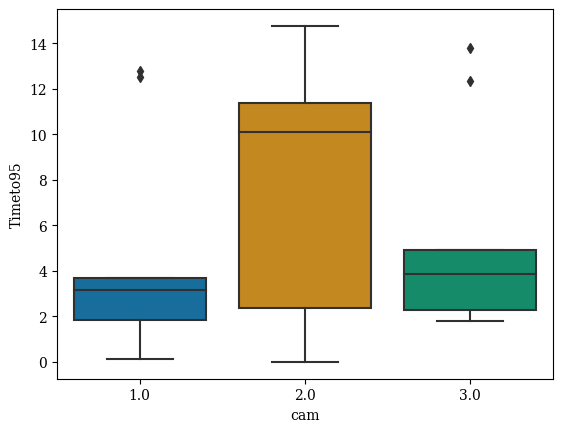

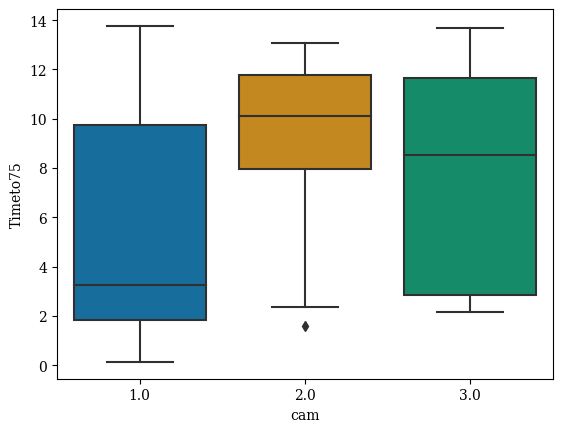

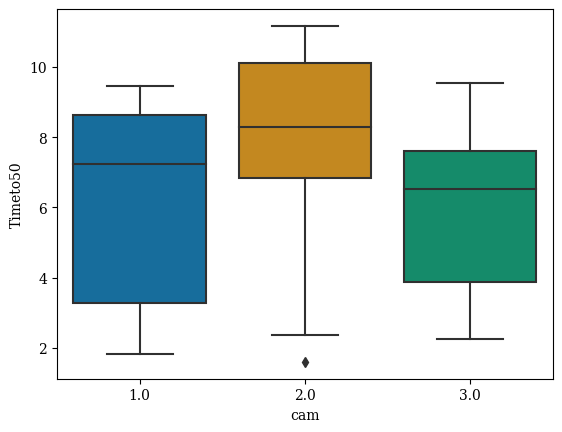

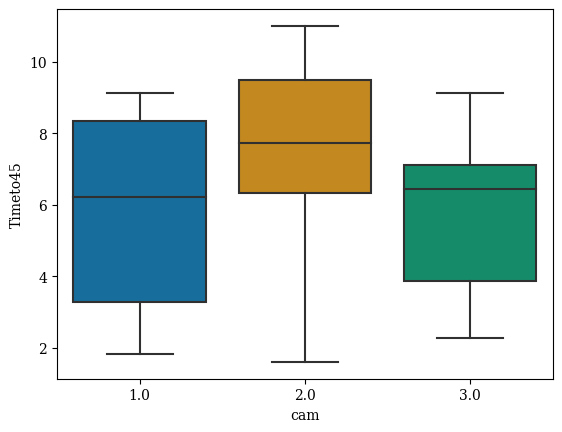

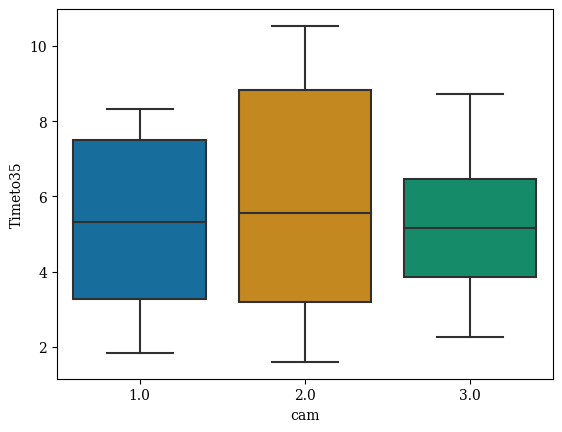

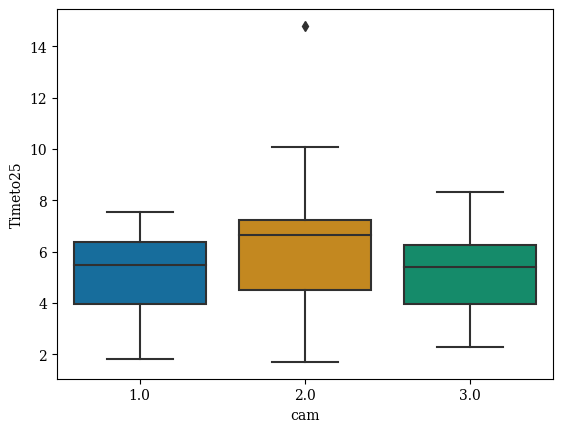

In [76]:
import seaborn as sns
plt.clf()
sns.boxplot(y='Timeto95', x='cam', data=df_sum, palette="colorblind")
plt.show()

plt.clf()
sns.boxplot(y='Timeto75', x='cam', data=df_sum, palette="colorblind")
plt.show()

plt.clf()
sns.boxplot(y='Timeto50', x='cam', data=df_sum, palette="colorblind")
plt.show()

plt.clf()
sns.boxplot(y='Timeto45', x='cam', data=df_sum, palette="colorblind")
plt.show()

plt.clf()
sns.boxplot(y='Timeto35', x='cam', data=df_sum, palette="colorblind")
plt.show()

plt.clf()
sns.boxplot(y='Timeto25', x='cam', data=df_sum, palette="colorblind")
plt.show()



###########
Anova for time to X

Time to 95

                sum_sq    df         F    PR(>F)
C(Chamber)   34.751687   2.0  0.721354  0.496335
Residual    578.107407  24.0       NaN       NaN 




/home/merge/env_merge/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


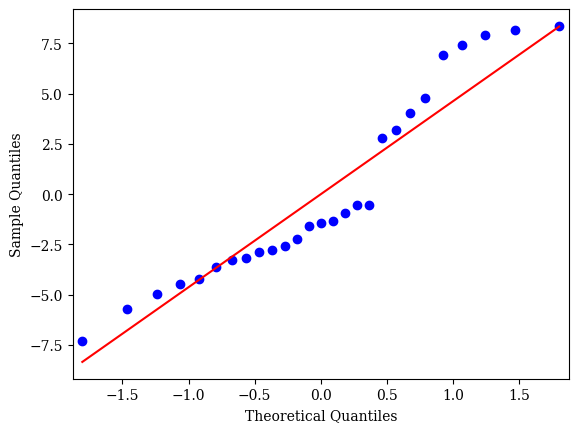


Time to 75

                sum_sq    df         F    PR(>F)
C(Chamber)   63.885432   2.0  1.552726  0.232196
Residual    493.728642  24.0       NaN       NaN 




/home/merge/env_merge/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


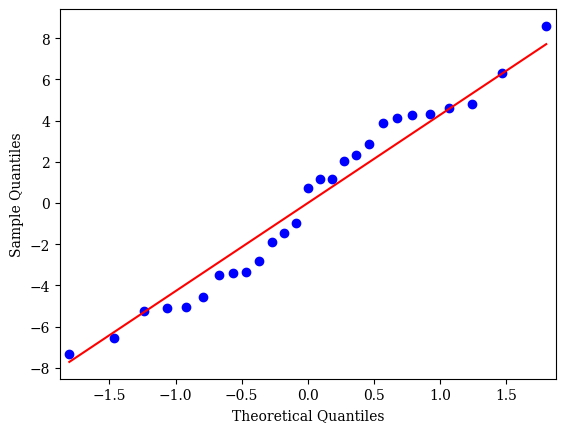


Time to 50

                sum_sq    df         F   PR(>F)
C(Chamber)    9.812922   2.0  0.535393  0.59227
Residual    219.941235  24.0       NaN      NaN 




/home/merge/env_merge/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


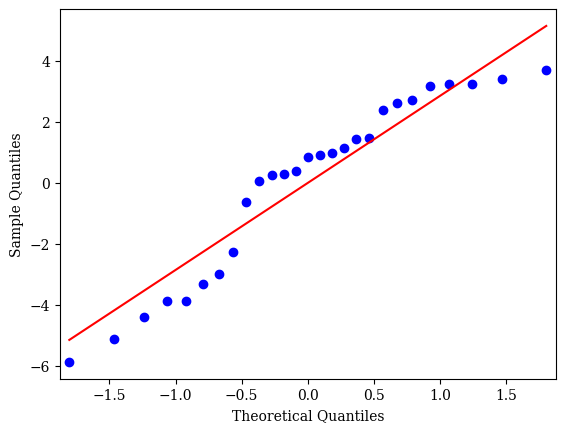


Time to 45

                sum_sq    df         F    PR(>F)
C(Chamber)    9.385432   2.0  0.579026  0.568082
Residual    194.507901  24.0       NaN       NaN 




/home/merge/env_merge/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


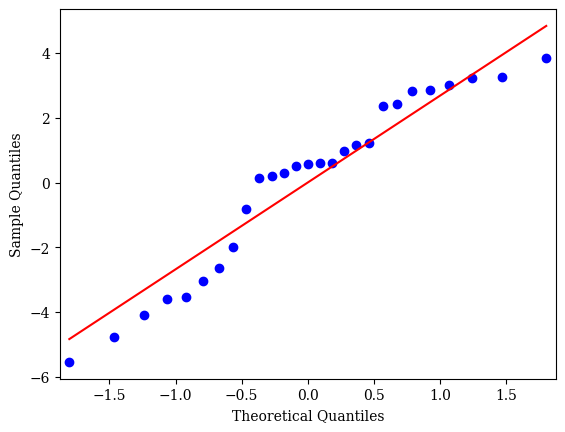


Time to 35

                sum_sq    df         F    PR(>F)
C(Chamber)    3.596132   2.0  0.259569  0.773522
Residual    166.251111  24.0       NaN       NaN 




/home/merge/env_merge/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


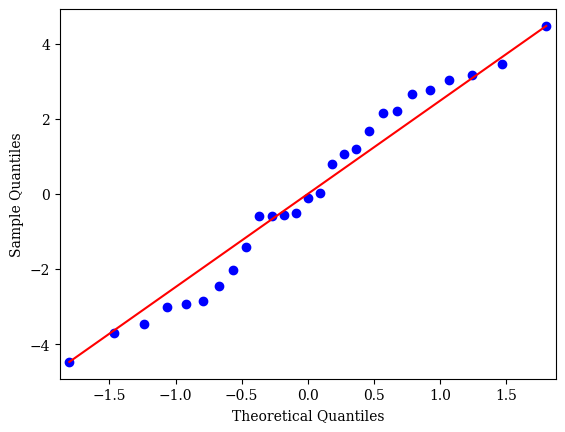


Time to 25

                sum_sq    df        F    PR(>F)
C(Chamber)   16.969465   2.0  1.19221  0.320896
Residual    170.803457  24.0      NaN       NaN 




/home/merge/env_merge/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


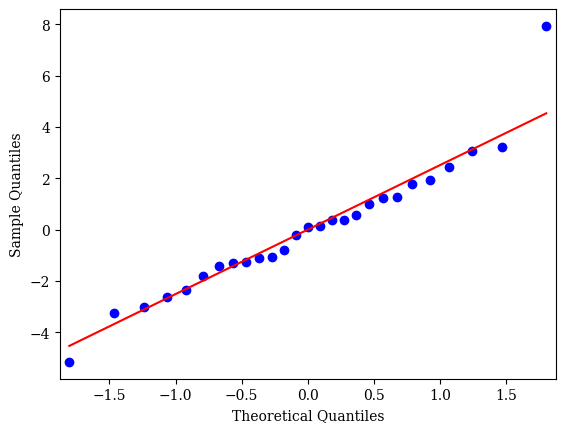

In [60]:
##ANOVA FOR TIME

import statsmodels.api as sm
from statsmodels.formula.api import ols

print('''
###########
Anova for time to X''')


print('''
Time to 95
''')
model2 = ols('Timeto95 ~ C(Chamber)', data=df_sum).fit()
anova_table = sm.stats.anova_lm(model2, typ=2)
print(anova_table.head(), "\n\n")
res = model2.resid
fig = sm.qqplot(res, line='s')
plt.show()

print('''
Time to 75
''')
model2 = ols('Timeto75 ~ C(Chamber)', data=df_sum).fit()
anova_table = sm.stats.anova_lm(model2, typ=2)
print(anova_table.head(), "\n\n")
res = model2.resid
fig = sm.qqplot(res, line='s')
plt.show()

print('''
Time to 50
''')
model2 = ols('Timeto50 ~ C(Chamber)', data=df_sum).fit()
anova_table = sm.stats.anova_lm(model2, typ=2)
print(anova_table.head(), "\n\n")
res = model2.resid
fig = sm.qqplot(res, line='s')
plt.show()

print('''
Time to 45
''')
model2 = ols('Timeto45 ~ C(Chamber)', data=df_sum).fit()
anova_table = sm.stats.anova_lm(model2, typ=2)
print(anova_table.head(), "\n\n")
res = model2.resid
fig = sm.qqplot(res, line='s')
plt.show()

print('''
Time to 35
''')
model2 = ols('Timeto35 ~ C(Chamber)', data=df_sum).fit()
anova_table = sm.stats.anova_lm(model2, typ=2)
print(anova_table.head(), "\n\n")
res = model2.resid
fig = sm.qqplot(res, line='s')
plt.show()


print('''
Time to 25
''')
model2 = ols('Timeto25 ~ C(Chamber)', data=df_sum).fit()
anova_table = sm.stats.anova_lm(model2, typ=2)
print(anova_table.head(), "\n\n")
res = model2.resid
fig = sm.qqplot(res, line='s')
plt.show()

,Frame,Tank 3 Slice 1 Max,Tank 3 Slice 2 Max,Tank 3 Slice 3 Max,Tank 3 Slice 4 Max,Tank 3 Slice 5 Max,Tank 3 Slice 6 Max,Tank 3 Slice 7 Max,Nab25,Nab35,Nab45,Nab50,Nab75,Nab95
3247,3248,0.0,0.000000,0.621176,0.000000,0.000000,0.0,0.0,0,0,0,0,0,0
3248,3249,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,0,0,0,0,0
3249,3250,0.0,0.000000,0.662588,0.000000,0.000000,0.0,0.0,0,0,0,0,0,0
3250,3251,0.0,0.455529,0.869647,0.414118,0.455529,0.0,0.0,0,0,0,0,0,0
3251,3252,0.0,0.621176,0.621176,0.000000,0.000000,0.0,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3744,3745,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,0,0,0,0,0
3745,3746,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,0,0,0,0,0
3746,3747,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,0,0,0,0,0
3747,3748,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,0,0,0,0,0


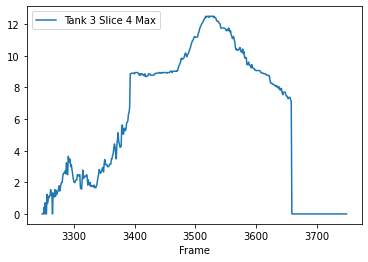

In [13]:
df_c3p6.plot(x='Frame', y='Tank 3 Slice 4 Max')
df_c3p6



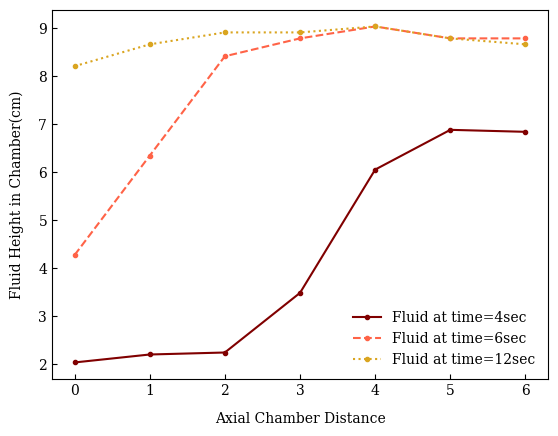

In [57]:
dfpl = df_c3p6.loc[df_c3p6['Frame']==3370]
dfpl
hor = [0,1,2,3,4,5,6]
ax_dist = [dfpl['Tank 3 Slice 1 Max'], dfpl['Tank 3 Slice 2 Max'], dfpl['Tank 3 Slice 3 Max'], 
          dfpl['Tank 3 Slice 4 Max'], dfpl['Tank 3 Slice 5 Max'], dfpl['Tank 3 Slice 6 Max'],
          dfpl['Tank 3 Slice 7 Max']]

dfpl1 = df_c3p6.loc[df_c3p6['Frame']==3430]
dfpl1
hor = [0,1,2,3,4,5,6]
ax_dist1 = [dfpl1['Tank 3 Slice 1 Max'], dfpl1['Tank 3 Slice 2 Max'], dfpl1['Tank 3 Slice 3 Max'], 
          dfpl1['Tank 3 Slice 4 Max'], dfpl1['Tank 3 Slice 5 Max'], dfpl1['Tank 3 Slice 6 Max'],
          dfpl1['Tank 3 Slice 7 Max']]

dfpl2 = df_c3p6.loc[df_c3p6['Frame']==3610]
dfpl2
ax_dist2 = [dfpl2['Tank 3 Slice 1 Max'], dfpl2['Tank 3 Slice 2 Max'], dfpl2['Tank 3 Slice 3 Max'], 
          dfpl2['Tank 3 Slice 4 Max'], dfpl2['Tank 3 Slice 5 Max'], dfpl2['Tank 3 Slice 6 Max'],
          dfpl2['Tank 3 Slice 7 Max']]

import matplotlib as mpl



plt.plot(hor, ax_dist, color='maroon', label="Fluid at time=4sec", 
         marker='.', linestyle='solid')
plt.plot(hor, ax_dist1, color='tomato', label="Fluid at time=6sec", 
         marker='.', linestyle='dashed')
plt.plot(hor, ax_dist2, color='goldenrod', label="Fluid at time=12sec", 
         marker='.', linestyle='dotted')
plt.xlabel("Axial Chamber Distance", labelpad=10)
plt.ylabel("Fluid Height in Chamber(cm)", labelpad=10)
plt.legend(frameon=False)

ax = plt.gca()
plt.rcdefaults()
plt.rcParams["font.family"] = "serif"
plt.rcParams['font.size'] = 10
ax.xaxis.set_tick_params(which='major', direction='in', bottom='on')
ax.yaxis.set_tick_params(which='major', direction='in', left='on')
plt.savefig('Water_axial'+'.png', dpi=300, transparent=False, bbox_inches='tight')
# plt.ylim(0,h)
plt.show()



In [15]:
3248 + (12/frametime)

3608.0

In [16]:
import matplotlib.font_manager as fm
# Collect all the font names available to matplotlib
font_names = [f.name for f in fm.fontManager.ttflist]
print(font_names)

['DejaVu Serif', 'cmr10', 'cmss10', 'DejaVu Sans Mono', 'DejaVu Serif', 'STIXSizeFourSym', 'cmmi10', 'STIXNonUnicode', 'STIXSizeOneSym', 'STIXGeneral', 'STIXNonUnicode', 'DejaVu Serif', 'cmb10', 'STIXSizeThreeSym', 'STIXSizeOneSym', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'cmsy10', 'cmtt10', 'DejaVu Serif', 'DejaVu Sans', 'DejaVu Sans Display', 'STIXNonUnicode', 'STIXSizeTwoSym', 'STIXSizeFiveSym', 'STIXSizeTwoSym', 'DejaVu Sans', 'DejaVu Sans Mono', 'cmex10', 'STIXGeneral', 'DejaVu Sans', 'DejaVu Serif Display', 'STIXNonUnicode', 'DejaVu Sans', 'STIXSizeFourSym', 'STIXGeneral', 'STIXSizeThreeSym', 'STIXGeneral', 'Lohit Malayalam', 'Laksaman', 'Liberation Sans Narrow', 'Tlwg Typo', 'Droid Sans Fallback', 'Sahadeva', 'Noto Sans CJK JP', 'Liberation Mono', 'KacstNaskh', 'Ubuntu', 'Padauk Book', 'Laksaman', 'OpenSymbol', 'FreeMono', 'FreeSerif', 'Tlwg Typewriter', 'Lohit Kannada', 'Sawasdee', 'Umpush', 'AnjaliOldLipi', 'Mitra Mono', 'Tlwg Typo', 'KacstOffice', 'Liberation Serif', 'Liberat

In [77]:
df_summnew = df_sum.replace({'cam': {1:'Ringed', 2: 'Control', 3:'Perforated'}})
df_summnew = df_summnew.rename(columns={'cam': 'Chamber'})
df_sum = df_summnew
# df_sum

In [17]:
df_c1 = pd.concat([df_c1p1, df_c1p2, df_c1p3, df_c1p4, df_c1p5, df_c1p6, df_c1p7, df_c1p8, df_c1p9],ignore_index=True)

In [18]:
df_c2 = pd.concat([df_c2p1, df_c2p2, df_c2p3, df_c2p4, df_c2p5, df_c2p6, df_c2p7, df_c2p8, df_c2p9],ignore_index=True)

In [19]:
df_c3 = pd.concat([df_c3p1, df_c3p2, df_c3p3, df_c3p4, df_c3p5, df_c3p6, df_c3p7, df_c3p8, df_c3p9],ignore_index=True)

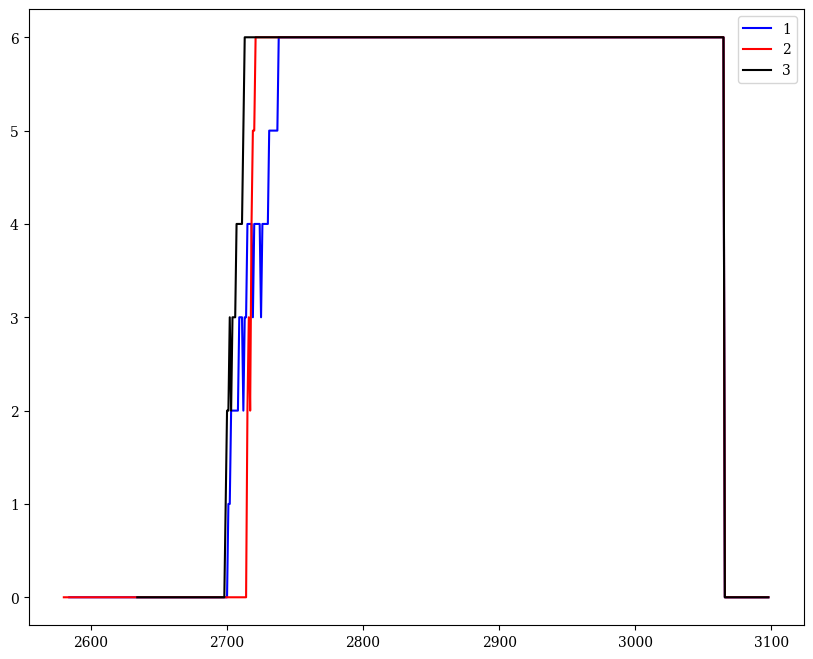

In [20]:
plt.figure(figsize=(10,8))
plt.plot(df_c1p5["Nab25"], color='blue', label='1')
plt.plot(df_c2p5["Nab25"], color='red', label='2')
plt.plot(df_c3p5["Nab25"], color='black', label='3')
import statsmodels.api as sm
from statsmodels.formula.api import olsplt.legend()


###########
Anova for frac to X

FRAc to 95

            sum_sq    df         F    PR(>F)
C(cam)    0.000002   2.0  2.850399  0.077503
Residual  0.000008  24.0       NaN       NaN 




/home/merge/env_merge/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


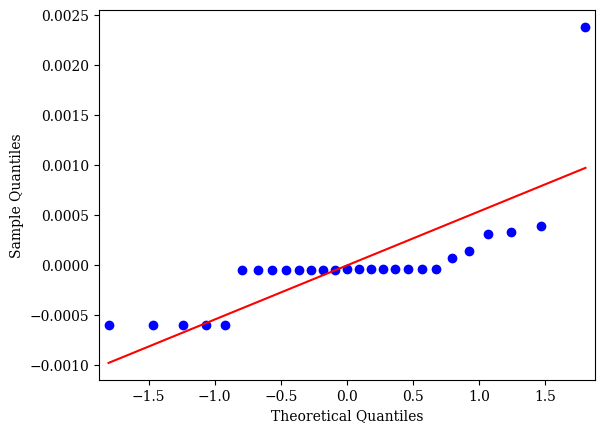


FRac to 75

                sum_sq    df         F    PR(>F)
C(cam)    4.227756e-07   2.0  0.164492  0.849273
Residual  3.084228e-05  24.0       NaN       NaN 




/home/merge/env_merge/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


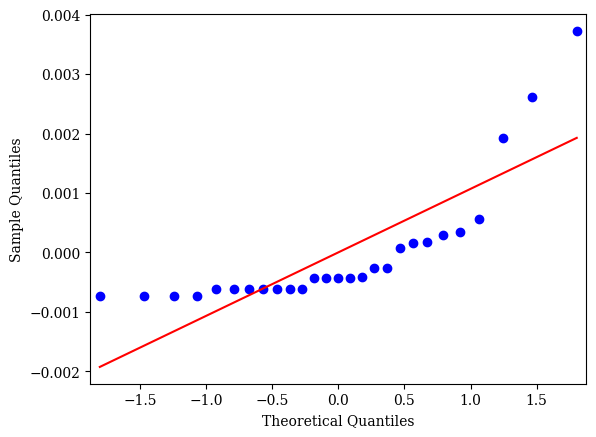


frac to 50

                sum_sq    df         F    PR(>F)
C(cam)    2.009145e-07   2.0  0.023431  0.976863
Residual  1.028956e-04  24.0       NaN       NaN 




/home/merge/env_merge/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


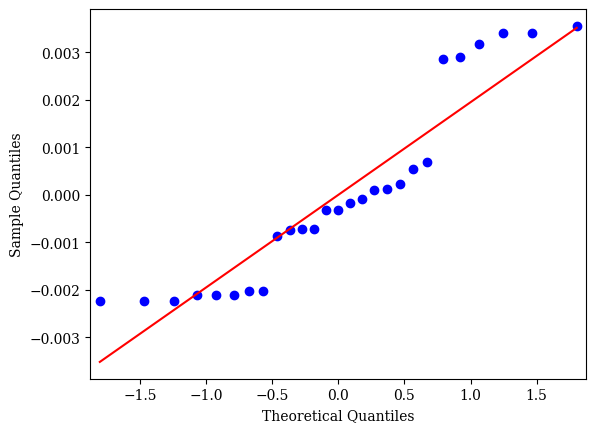


frac to 45

                sum_sq    df         F    PR(>F)
C(cam)    7.927633e-07   2.0  0.070649  0.931982
Residual  1.346545e-04  24.0       NaN       NaN 




/home/merge/env_merge/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


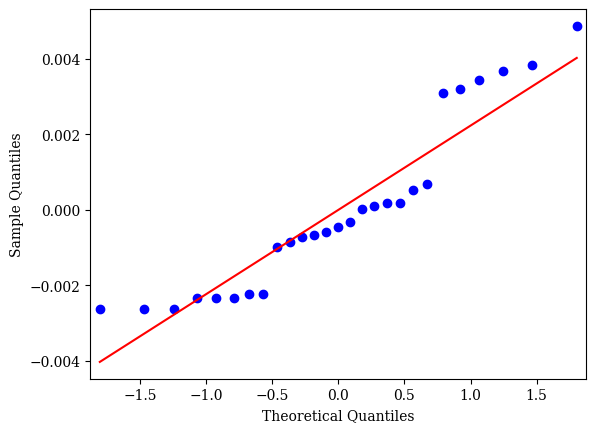


frac to 35

                sum_sq    df         F    PR(>F)
C(cam)    1.282302e-08   2.0  0.000563  0.999437
Residual  2.732086e-04  24.0       NaN       NaN 




/home/merge/env_merge/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


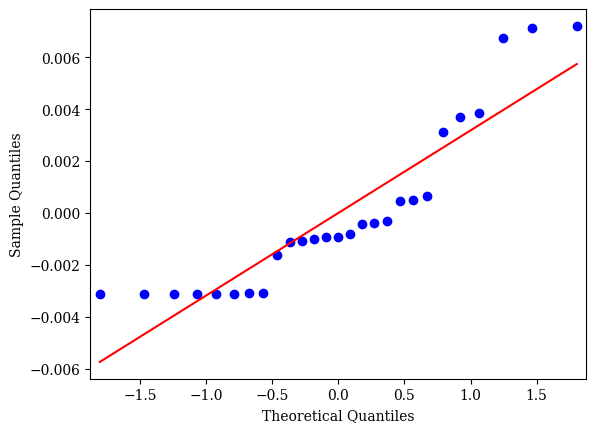


frac to 25

            sum_sq    df         F    PR(>F)
C(cam)    0.000012   2.0  0.387115  0.683177
Residual  0.000387  24.0       NaN       NaN 




/home/merge/env_merge/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


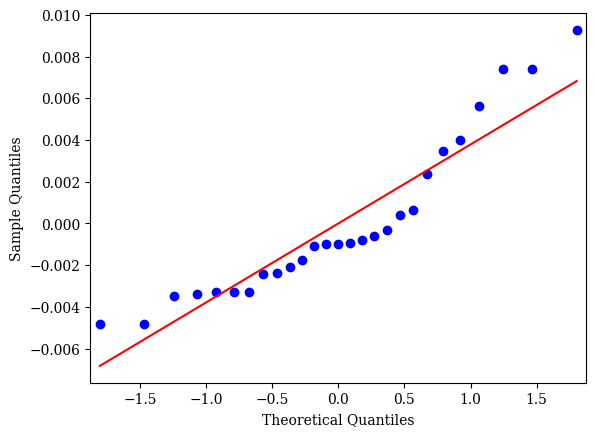

In [22]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

print('''
###########
Anova for frac to X''')


print('''
FRAc to 95
''')
model2 = ols('frac95 ~ C(cam)', data=df_sum).fit()
anova_table = sm.stats.anova_lm(model2, typ=2)
print(anova_table.head(), "\n\n")
res = model2.resid
fig = sm.qqplot(res, line='s')
plt.show()

print('''
FRac to 75
''')
model2 = ols('frac75 ~ C(cam)', data=df_sum).fit()
anova_table = sm.stats.anova_lm(model2, typ=2)
print(anova_table.head(), "\n\n")
res = model2.resid
fig = sm.qqplot(res, line='s')
plt.show()

print('''
frac to 50
''')
model2 = ols('frac50 ~ C(cam)', data=df_sum).fit()
anova_table = sm.stats.anova_lm(model2, typ=2)
print(anova_table.head(), "\n\n")
res = model2.resid
fig = sm.qqplot(res, line='s')
plt.show()

print('''
frac to 45
''')
model2 = ols('frac45 ~ C(cam)', data=df_sum).fit()
anova_table = sm.stats.anova_lm(model2, typ=2)
print(anova_table.head(), "\n\n")
res = model2.resid
fig = sm.qqplot(res, line='s')
plt.show()


print('''
frac to 35
''')
model2 = ols('frac35 ~ C(cam)', data=df_sum).fit()
anova_table = sm.stats.anova_lm(model2, typ=2)
print(anova_table.head(), "\n\n")
res = model2.resid
fig = sm.qqplot(res, line='s')
plt.show()


print('''
frac to 25
''')
model2 = ols('frac25 ~ C(cam)', data=df_sum).fit()
anova_table = sm.stats.anova_lm(model2, typ=2)
print(anova_table.head(), "\n\n")
res = model2.resid
fig = sm.qqplot(res, line='s')
plt.show()


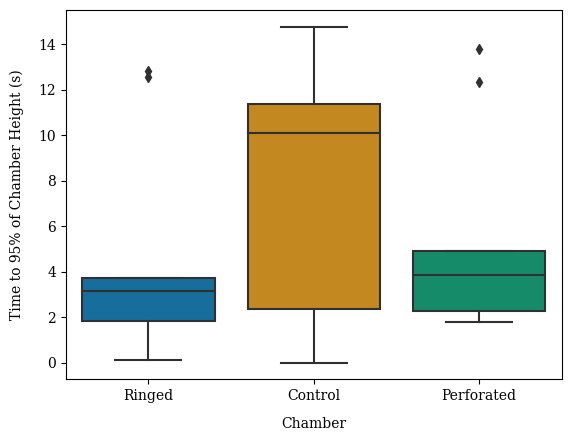

In [54]:
plt.clf()
sns.boxplot(y='Timeto95', x='Chamber', data=df_sum, palette="colorblind")
plt.xlabel("Chamber", labelpad=10)
plt.ylabel("Time to 95% of Chamber Height (s)", labelpad=10)

medians = df_sum.groupby(['Chamber'])['Timeto95'].median()
medians
plt.savefig('water_box95'+'.png', dpi=300, transparent=False, bbox_inches='tight')
plt.show()



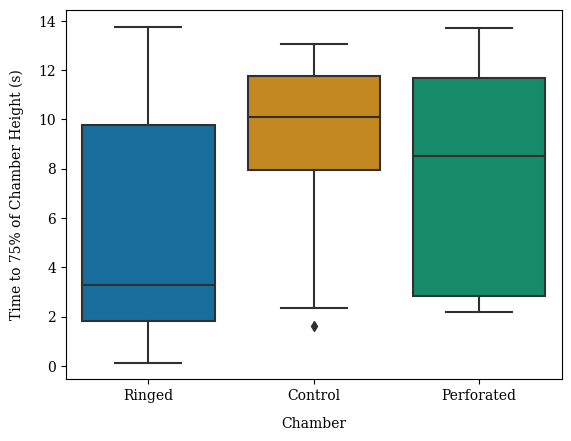

In [53]:
plt.clf()
sns.boxplot(y='Timeto75', x='Chamber', data=df_sum, palette="colorblind")
plt.xlabel("Chamber", labelpad=10)
plt.ylabel("Time to 75% of Chamber Height (s)", labelpad=10)
medians = df_sum.groupby(['Chamber'])['Timeto75'].median()
medians
plt.savefig('water_box75'+'.png', dpi=300, transparent=False, bbox_inches='tight')
plt.show()


In [34]:
df_c1["Max"] = df_c1.filter(regex=("Slice.*"),axis=1).max(axis=1)
df_c2["Max"] = df_c2.filter(regex=("Slice.*"),axis=1).max(axis=1)
df_c3["Max"] = df_c3.filter(regex=("Slice.*"),axis=1).max(axis=1)

df_c1["Median"] = df_c1.filter(regex=("Slice.*"),axis=1).median(axis=1)
df_c2["Median"] = df_c2.filter(regex=("Slice.*"),axis=1).median(axis=1)
df_c3["Median"] = df_c3.filter(regex=("Slice.*"),axis=1).median(axis=1)

df_c1

,Frame,Tank 1 Slice 1 Max,Tank 1 Slice 2 Max,Tank 1 Slice 3 Max,Tank 1 Slice 4 Max,Tank 1 Slice 5 Max,Tank 1 Slice 6 Max,Tank 1 Slice 7 Max,Nab25,Nab35,Nab45,Nab50,Nab75,Nab95,Max,Median
0,72,0.0000,0.000000,1.068508,0.0000,0.0,0.0,0.0,0,0,0,0,0,0,1.068508,0.0
1,73,0.0000,0.000000,1.315086,0.0000,0.0,0.0,0.0,0,0,0,0,0,0,1.315086,0.0
2,74,0.0000,1.232893,0.000000,0.0000,0.0,0.0,0.0,0,0,0,0,0,0,1.232893,0.0
3,75,1.1507,1.191797,0.000000,1.1507,0.0,0.0,0.0,0,0,0,0,0,0,1.191797,0.0
4,76,0.0000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0,0,0,0,0,0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5102,5695,0.0000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0,0,0,0,0,0,0.000000,0.0
5103,5696,0.0000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0,0,0,0,0,0,0.000000,0.0
5104,5697,0.0000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0,0,0,0,0,0,0.000000,0.0
5105,5698,0.0000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0,0,0,0,0,0,0.000000,0.0


/tmp/ipykernel_2405/2960329867.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c3p2["Frame"] = df_c3p2["Frame"]*frametime - 25


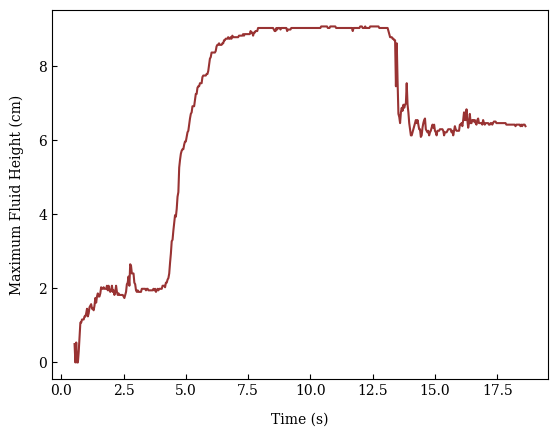

In [58]:
df_c3p2 = df_c3[ (df_c3["Frame"] > 700) & (df_c3["Frame"] < 1310) ]
df_c3p2["Frame"] = df_c3p2["Frame"]*frametime - 25
ax = plt.gca()
plt.rcdefaults()
plt.rcParams["font.family"] = "serif"
plt.rcParams['font.size'] = 10
ax.xaxis.set_tick_params(which='major', direction='in', bottom='on')
ax.yaxis.set_tick_params(which='major', direction='in', left='on')
plt.plot(df_c3p2["Frame"], df_c3p2["Max"], 
             label="Cam 3 Med, parab 3", alpha=0.8, color='maroon')
plt.xlabel('Time (s)', labelpad=10)
plt.ylabel('Maximum Fluid Height (cm)', labelpad=10)
plt.savefig('watertimeseries'+'.png', dpi=300, transparent=False, bbox_inches='tight')
plt.show()

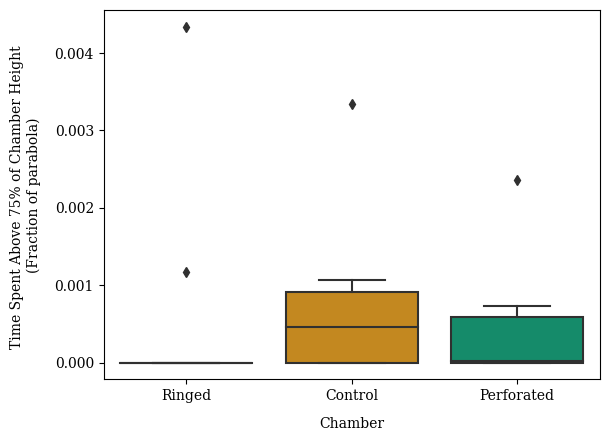

In [81]:
plt.clf()
sns.boxplot(y='frac75', x='Chamber', data=df_sum, palette="colorblind")
plt.xlabel("Chamber", labelpad=10)
plt.ylabel("Fraction of Parabo Spent Above 75% of Chamber Height \n(Fraction of parabola)", labelpad=10)

medians = df_sum.groupby(['Chamber'])['Timeto95'].median()
medians
plt.savefig('water_boxfrac75'+'.png', dpi=300, transparent=False, bbox_inches='tight')
plt.show()

